In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import scipy.stats as stats


data_dir = '/content/content/MyDrive/data/AnomalyDetection'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['bank_transactions_data_2.csv']

# __Introduction to anomaly detection__
- **Anomaly detection** identifies unusual patterns, behaviors, or data points that significantly deviate from expected trends.  
- It plays a crucial role in fraud detection, cybersecurity, healthcare diagnostics, and industrial predictive maintenance.  
- Machine learning models, statistical techniques, and deep learning help automate and enhance anomaly detection accuracy.  
- A **Probability Density Function (PDF)** estimates likelihoods, flagging anomalies when probabilities fall below a threshold.  
- Practical applications include **server monitoring, fraud prevention, and network traffic analysis** in real-world scenarios.  

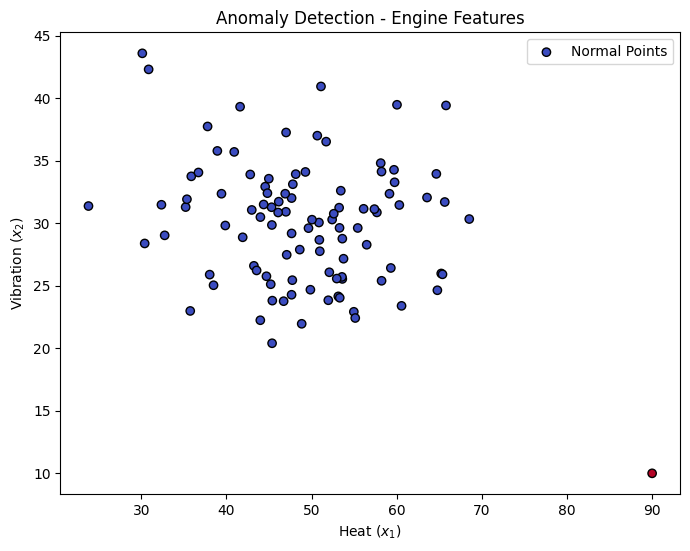

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate normal data points
num_samples = 100
heat = np.random.normal(loc=50, scale=10, size=num_samples)  # Feature x1: Heat
vibration = np.random.normal(loc=30, scale=5, size=num_samples)  # Feature x2: Vibration

# Introduce an anomaly
heat_anomaly = [90]  # Unusually high heat
vibration_anomaly = [10]  # Unusually low vibration

# Combine data
heat = np.append(heat, heat_anomaly)
vibration = np.append(vibration, vibration_anomaly)

# Create DataFrame
df = pd.DataFrame({'Heat': heat, 'Vibration': vibration})
df['Anomaly'] = [0] * num_samples + [1]  # 0 = Normal, 1 = Anomaly

# Plot scatter graph
plt.figure(figsize=(8, 6))
plt.scatter(df['Heat'], df['Vibration'], c=df['Anomaly'], cmap='coolwarm', edgecolors='k')
plt.xlabel("Heat ($x_1$)")
plt.ylabel("Vibration ($x_2$)")
plt.title("Anomaly Detection - Engine Features")
plt.legend(["Normal Points", "Anomaly"])
# plt.grid()
plt.show()

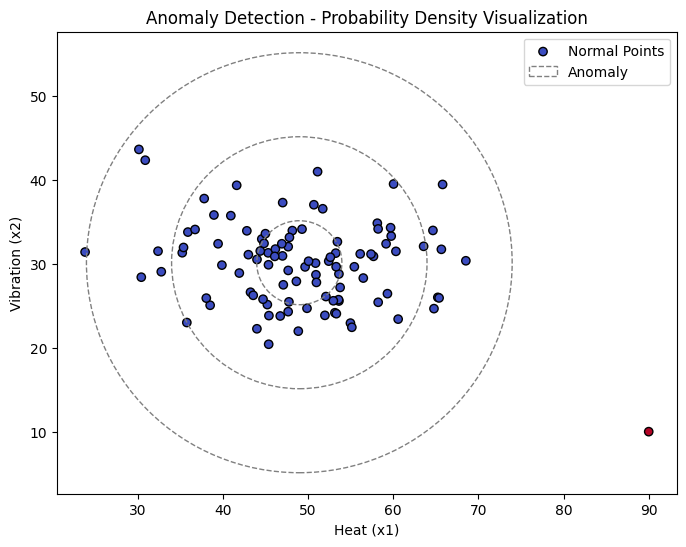

In [3]:
# Set seed for reproducibility
np.random.seed(42)

# Generate normal data points
num_samples = 100
heat = np.random.normal(loc=50, scale=10, size=num_samples)  # Feature x1: Heat
vibration = np.random.normal(loc=30, scale=5, size=num_samples)  # Feature x2: Vibration

# Introduce an anomaly
heat_anomaly = [90]  # Unusually high heat
vibration_anomaly = [10]  # Unusually low vibration

# Combine data
heat = np.append(heat, heat_anomaly)
vibration = np.append(vibration, vibration_anomaly)

# Create DataFrame
df = pd.DataFrame({'Heat': heat, 'Vibration': vibration})
df['Anomaly'] = [0] * num_samples + [1]  # 0 = Normal, 1 = Anomaly

# Calculate center of normal data points (mean values)
center_x = np.mean(heat[:-1])
center_y = np.mean(vibration[:-1])

# Define circle radii for high, medium, and low density regions
radii = [5, 15, 25]  # Increasing radius for lower probability density

# Plot scatter graph
plt.figure(figsize=(8, 6))
plt.scatter(df['Heat'], df['Vibration'], c=df['Anomaly'], cmap='coolwarm', edgecolors='k')

# Draw probability density circles
for r in radii:
    circle = plt.Circle((center_x, center_y), r, color='gray', fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)

# Labels and title
plt.xlabel("Heat (x1)")
plt.ylabel("Vibration (x2)")
plt.title("Anomaly Detection - Probability Density Visualization")
plt.legend(["Normal Points", "Anomaly"])

plt.show()

# __Gaussian normal distribution for anomaly detection__
- **Gaussian distribution helps model data behavior**, distinguishing normal values from potential anomalies in datasets.  
- **A bell-shaped curve visualizes probabilities**, with higher-density regions representing common occurrences and lower-density regions indicating rare events.  
- **The Probability Density Function (PDF) formula estimates likelihoods**, guiding anomaly detection using statistical principles.  
- **Standard deviation (σ) influences curve shape**, affecting data spread and highlighting unusual patterns for anomaly detection.  



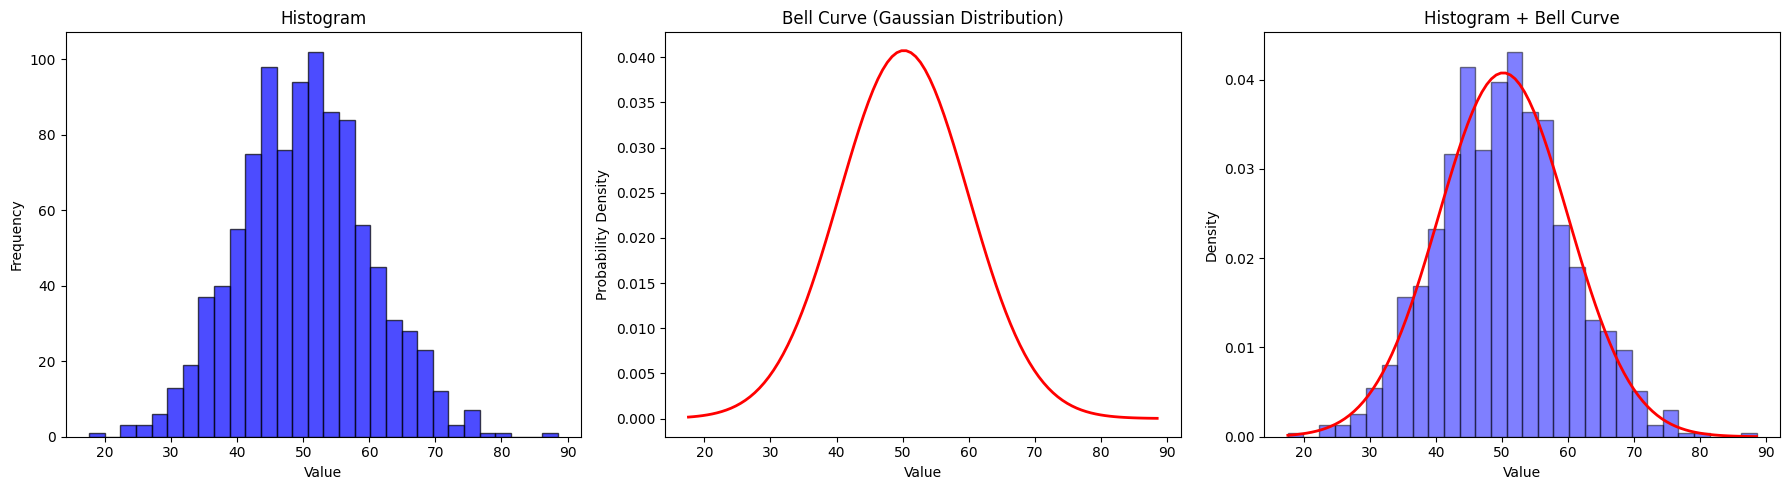

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data (Gaussian distribution)
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram (Bar graph)
axes[0].hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title("Histogram")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Bell Curve (Gaussian distribution)
x_values = np.linspace(min(data), max(data), 100)
y_values = norm.pdf(x_values, np.mean(data), np.std(data))
axes[1].plot(x_values, y_values, color='red', linewidth=2)
axes[1].set_title("Bell Curve (Gaussian Distribution)")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability Density")

# Combined Histogram + Bell Curve
axes[2].hist(data, bins=30, alpha=0.5, color='blue', edgecolor='black', density=True)
axes[2].plot(x_values, y_values, color='red', linewidth=2)
axes[2].set_title("Histogram + Bell Curve")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")

# Display plots
plt.tight_layout()
plt.show()

* $\mathbf{f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}}$
* $\boxed{\mathbf{pdf = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}}}$

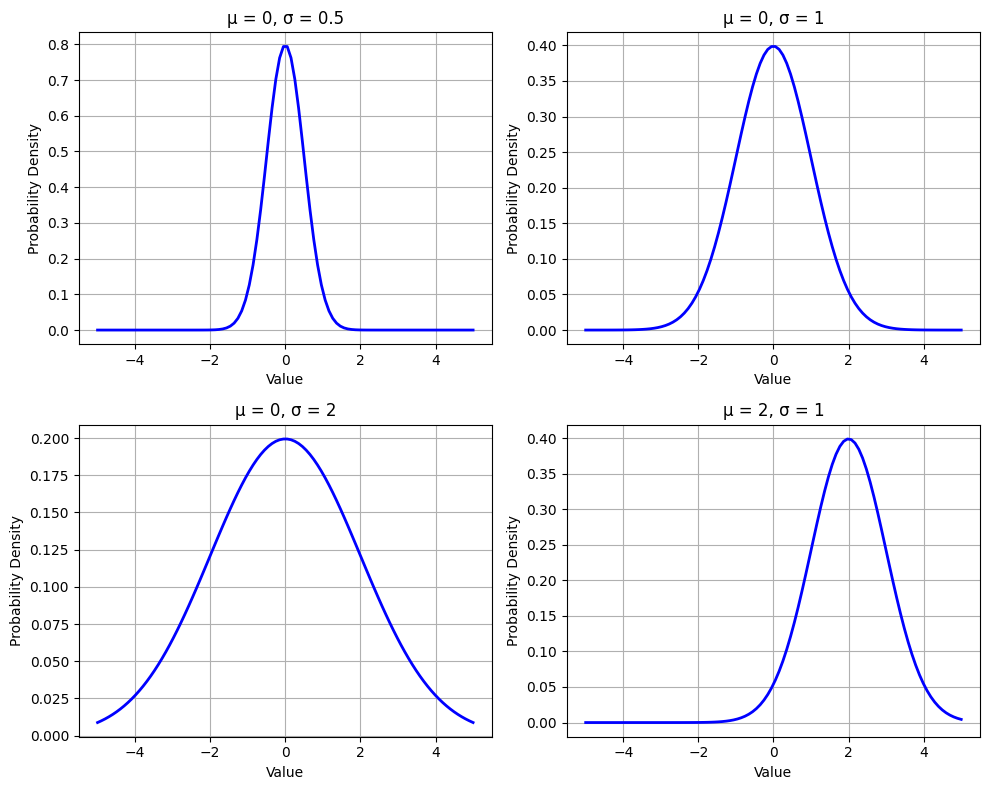

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define mean and standard deviation values
params = [(0, 0.5), (0, 1), (0, 2), (2, 1)]
titles = ["μ = 0, σ = 0.5", "μ = 0, σ = 1", "μ = 0, σ = 2", "μ = 2, σ = 1"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Generate and plot Gaussian distributions
x_values = np.linspace(-5, 5, 100)
for i, (mu, sigma) in enumerate(params):
    row, col = divmod(i, 2)  # Determine subplot position
    y_values = norm.pdf(x_values, mu, sigma)  # Compute probability density function
    axes[row, col].plot(x_values, y_values, color='blue', linewidth=2)
    axes[row, col].set_title(titles[i])
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Probability Density")
    axes[row, col].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# __The dataset for anomaly detection__
- https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
- Dataset preparation: A banking transaction dataset is organized for anomaly detection and exploratory data analysis.
- Feature processing: Locations are converted to numerical values using LabelEncoder for machine learning applications.
- Visualization improvement: After formatting TransactionDate, replotting reveals meaningful trends and anomaly patterns.


In [21]:
os.listdir()

['bank_transactions_data_2.csv']

In [7]:
df_train = pd.read_csv('bank_transactions_data_2.csv')

In [8]:
df_train.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [9]:
df_train.shape

(2512, 16)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [11]:
df_train.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [12]:
df_train.describe(include='O')

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX002496,AC00460,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


In [13]:
df_train.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


*  __TransactionAmount, Location, and TransactionDate__

In [14]:
df_train['Location'].value_counts()

,count
Location,
Fort Worth,70
Los Angeles,69
Oklahoma City,68
Charlotte,68
Philadelphia,67
Tucson,67
Omaha,65
Miami,64
Memphis,63


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['Location_encoder'] = labelencoder.fit_transform(df_train['Location'])

In [17]:
df_train['Location_encoder'].head()

,Location_encoder
0,36
1,15
2,23
3,33
4,1


In [18]:
df_train['Location_encoder'].value_counts()

,count
Location_encoder,
13,70
20,69
28,68
5,68
30,67
40,67
29,65
24,64
22,63


In [19]:
df_train.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Location_encoder
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,36
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,15
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,23
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,33
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,1


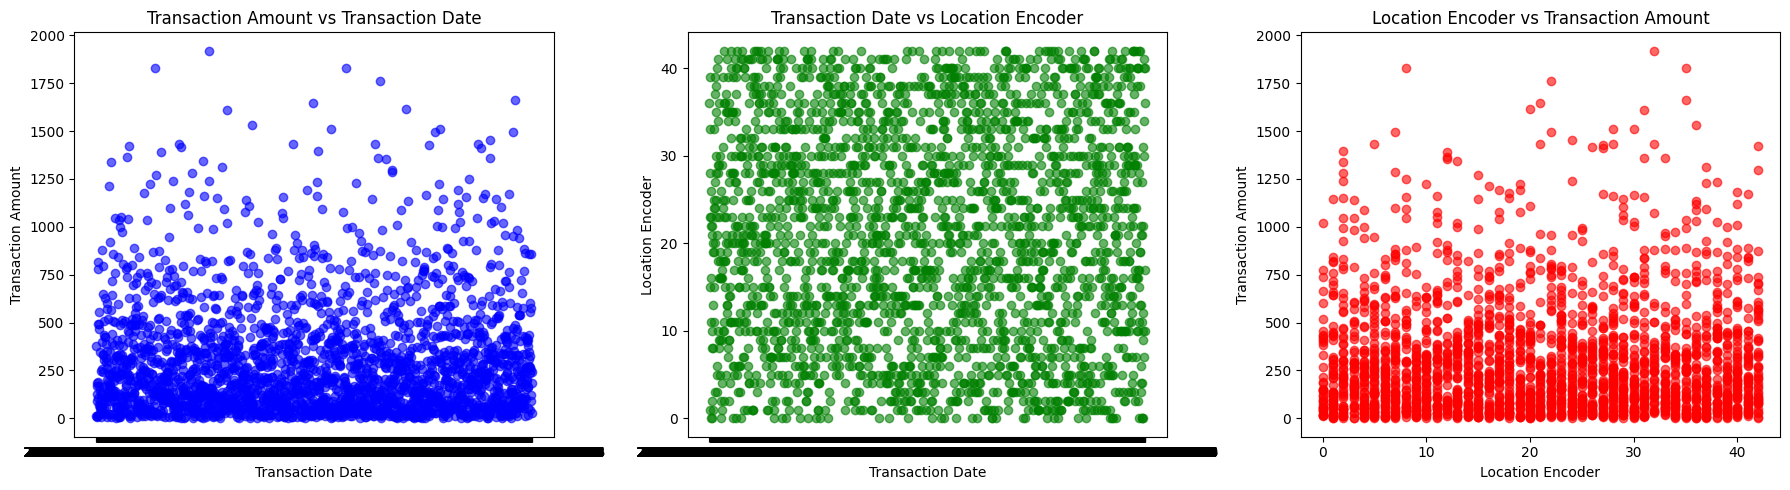

In [20]:
import matplotlib.pyplot as plt

# Create figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Transaction Amount vs Transaction Date
axes[0].scatter(df_train['TransactionDate'], df_train['TransactionAmount'], alpha=0.6, color='blue')
axes[0].set_title("Transaction Amount vs Transaction Date")
axes[0].set_xlabel("Transaction Date")
axes[0].set_ylabel("Transaction Amount")

# Plot 2: Transaction Date vs Location Encoder
axes[1].scatter(df_train['TransactionDate'], df_train['Location_encoder'], alpha=0.6, color='green')
axes[1].set_title("Transaction Date vs Location Encoder")
axes[1].set_xlabel("Transaction Date")
axes[1].set_ylabel("Location Encoder")

# Plot 3: Location Encoder vs Transaction Amount
axes[2].scatter(df_train['Location_encoder'], df_train['TransactionAmount'], alpha=0.6, color='red')
axes[2].set_title("Location Encoder vs Transaction Amount")
axes[2].set_xlabel("Location Encoder")
axes[2].set_ylabel("Transaction Amount")

# Improve layout
plt.tight_layout()
plt.show()


In [22]:
df_train['TransactionDate'].describe()

,TransactionDate
count,2512
unique,2512
top,2023-04-03 16:07:53
freq,1


In [23]:
df_train['TransactionDate'].head()

,TransactionDate
0,2023-04-11 16:29:14
1,2023-06-27 16:44:19
2,2023-07-10 18:16:08
3,2023-05-05 16:32:11
4,2023-10-16 17:51:24


In [24]:
# Convert column to datetime format
df_train['TransactionDate'] = pd.to_datetime(df_train['TransactionDate'])

# Now extract the hour
df_train['HourOfDay'] = df_train['TransactionDate'].dt.hour

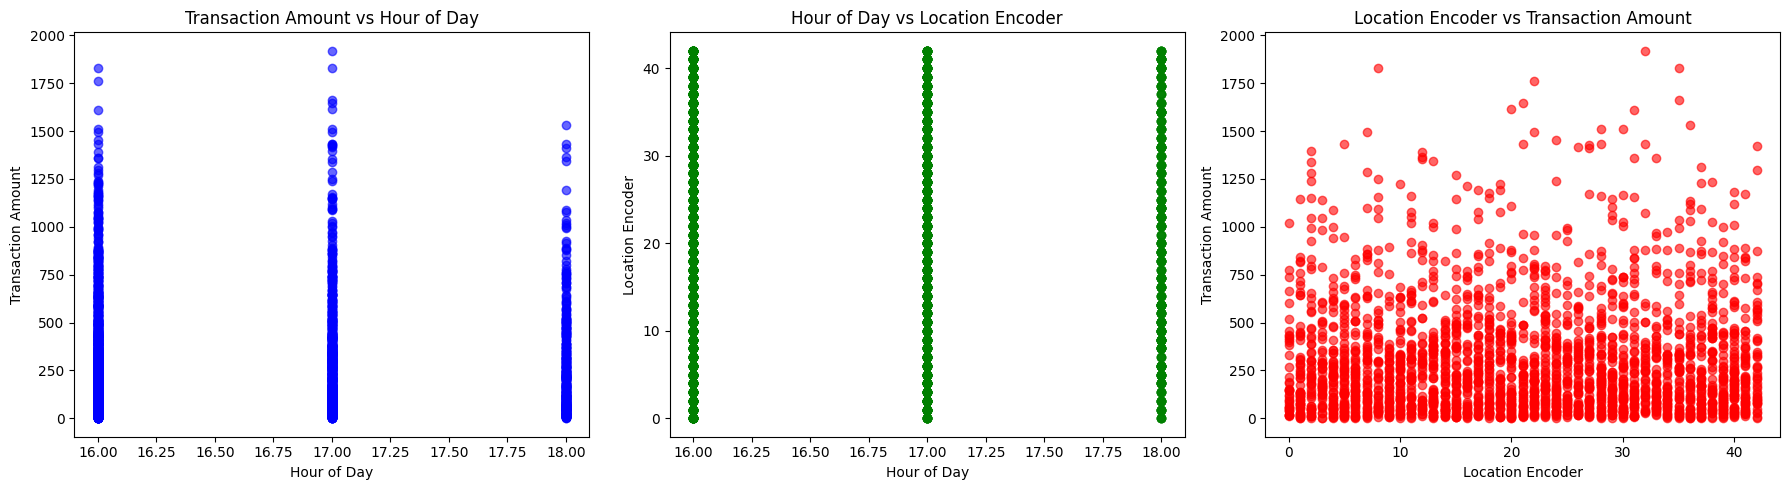

In [25]:




# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Transaction Amount vs Hour of Day
axes[0].scatter(df_train['HourOfDay'], df_train['TransactionAmount'], alpha=0.6, color='blue')
axes[0].set_title("Transaction Amount vs Hour of Day")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Transaction Amount")

# Plot 2: Hour of Day vs Location Encoder
axes[1].scatter(df_train['HourOfDay'], df_train['Location_encoder'], alpha=0.6, color='green')
axes[1].set_title("Hour of Day vs Location Encoder")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Location Encoder")

# Plot 3: Location Encoder vs Transaction Amount
axes[2].scatter(df_train['Location_encoder'], df_train['TransactionAmount'], alpha=0.6, color='red')
axes[2].set_title("Location Encoder vs Transaction Amount")
axes[2].set_xlabel("Location Encoder")
axes[2].set_ylabel("Transaction Amount")

# Improve layout
plt.tight_layout()
plt.show()

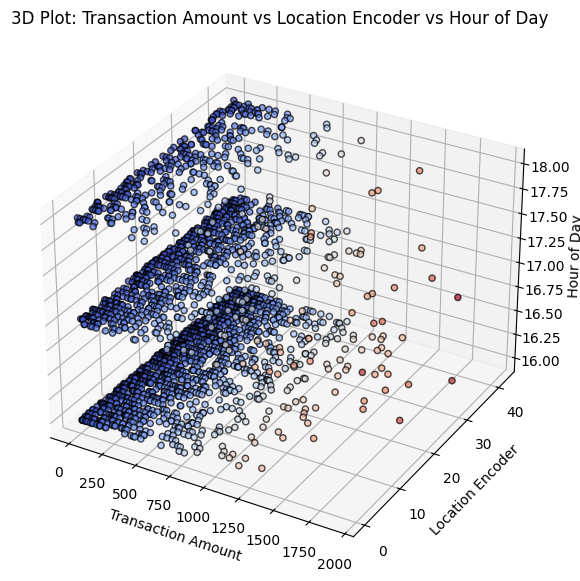

In [26]:
selected_features = df_train[['TransactionAmount', 'Location_encoder', 'HourOfDay']]

# Initialize figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(
    df_train['TransactionAmount'],
    df_train['Location_encoder'],
    df_train['HourOfDay'],
    c=df_train['TransactionAmount'], cmap='coolwarm', edgecolors='k', alpha=0.7
)

# Set labels
ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Location Encoder")
ax.set_zlabel("Hour of Day")
ax.set_title("3D Plot: Transaction Amount vs Location Encoder vs Hour of Day")

# Show plot
plt.show()

# __Anomaly detection algorithm__
- **Anomaly detection identifies rare data points**, helping detect fraud, system failures, and unusual patterns.  
- **PDF-based techniques estimate likelihoods**, flagging anomalies when values fall below a predefined threshold.  
- **Multiplying PDF values provides overall probability**, enabling anomaly detection in high-dimensional datasets.  
- **Visualization helps highlight anomalies**, making patterns easier to detect and analyze.  
- **Scikit-Learn offers various models**, including Gaussian Mixture Model, Isolation Forest, and Local Outlier Factor.  
- **Different methods yield varying results**, emphasizing the need for careful evaluation and threshold selection.  

In [27]:
df_train['pdf_transaction'] = stats.norm.pdf(
    df_train['TransactionAmount'].values,
    np.mean(df_train['TransactionAmount'].values),
    np.std(df_train['TransactionAmount'].values)
)

df_train['pdf_loc_encoder'] = stats.norm.pdf(
    df_train['Location_encoder'].values,
    np.mean(df_train['Location_encoder'].values),
    np.std(df_train['Location_encoder'].values)
)

df_train['pdf_hr'] = stats.norm.pdf(
    df_train['HourOfDay'].values,
    np.mean(df_train['HourOfDay'].values),
    np.std(df_train['HourOfDay'].values)
)


In [28]:
df_train.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Location_encoder,HourOfDay,pdf_transaction,pdf_loc_encoder,pdf_hr
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,36,16,0.000853,0.015439,0.378148
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,15,16,0.001318,0.028846,0.378148
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,Student,56,1,1122.35,2024-11-04 08:07:04,23,18,0.001151,0.032147,0.093305
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:06,33,16,0.001268,0.020208,0.378148
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:39,1,17,0.000851,0.008553,0.478904


In [30]:
# Compute overall anomaly score by multiplying PDFs
df_train['Anomaly_Score'] = df_train['pdf_transaction'] * df_train['pdf_loc_encoder'] * df_train['pdf_hr']

In [31]:
df_train.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Location_encoder,HourOfDay,pdf_transaction,pdf_loc_encoder,pdf_hr,Anomaly_Score
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,81,1,5112.21,2024-11-04 08:08:08,36,16,0.000853,0.015439,0.378148,0.000005
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,141,1,13758.91,2024-11-04 08:09:35,15,16,0.001318,0.028846,0.378148,0.000014
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,56,1,1122.35,2024-11-04 08:07:04,23,18,0.001151,0.032147,0.093305,0.000003
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,25,1,8569.06,2024-11-04 08:09:06,33,16,0.001268,0.020208,0.378148,0.000010
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,198,1,7429.40,2024-11-04 08:06:39,1,17,0.000851,0.008553,0.478904,0.000003


In [32]:
# Setting threshold
threshold = np.percentile(df_train['Anomaly_Score'], 5)  # Bottom 5% as anomalies
df_train['IsAnomaly'] = (df_train['Anomaly_Score'] < threshold).astype(int)

In [33]:
df_train['IsAnomaly'].value_counts()

,count
IsAnomaly,
0,2386
1,126


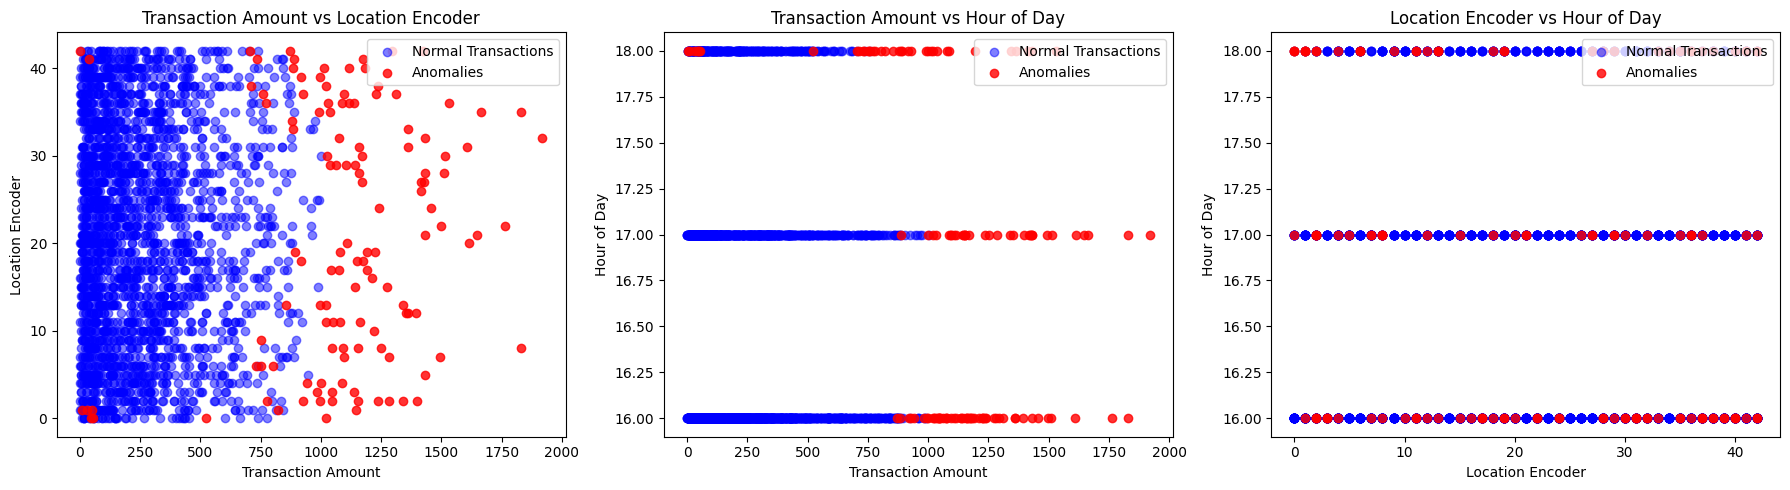

In [36]:
# Initialize figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Transaction Amount vs Location Encoder
axes[0].scatter(df_train[df_train['IsAnomaly'] == 0]['TransactionAmount'], df_train[df_train['IsAnomaly'] == 0]['Location_encoder'], color='blue', alpha=0.5, label="Normal Transactions")
axes[0].scatter(df_train[df_train['IsAnomaly'] == 1]['TransactionAmount'], df_train[df_train['IsAnomaly'] == 1]['Location_encoder'], color='red', alpha=0.8, label="Anomalies")
axes[0].set_title("Transaction Amount vs Location Encoder")
axes[0].set_xlabel("Transaction Amount")
axes[0].set_ylabel("Location Encoder")

# Plot 2: Transaction Amount vs Hour of Day
axes[1].scatter(df_train[df_train['IsAnomaly'] == 0]['TransactionAmount'], df_train[df_train['IsAnomaly'] == 0]['HourOfDay'], color='blue', alpha=0.5, label="Normal Transactions")
axes[1].scatter(df_train[df_train['IsAnomaly'] == 1]['TransactionAmount'], df_train[df_train['IsAnomaly'] == 1]['HourOfDay'], color='red', alpha=0.8, label="Anomalies")
axes[1].set_title("Transaction Amount vs Hour of Day")
axes[1].set_xlabel("Transaction Amount")
axes[1].set_ylabel("Hour of Day")

# Plot 3: Location Encoder vs Hour of Day
axes[2].scatter(df_train[df_train['IsAnomaly'] == 0]['Location_encoder'], df_train[df_train['IsAnomaly'] == 0]['HourOfDay'], color='blue', alpha=0.5, label="Normal Transactions")
axes[2].scatter(df_train[df_train['IsAnomaly'] == 1]['Location_encoder'], df_train[df_train['IsAnomaly'] == 1]['HourOfDay'], color='red', alpha=0.8, label="Anomalies")
axes[2].set_title("Location Encoder vs Hour of Day")
axes[2].set_xlabel("Location Encoder")
axes[2].set_ylabel("Hour of Day")

# Improve layout and display legend
plt.tight_layout()
for ax in axes:
    ax.legend()

plt.show()

In [37]:
df_train[df_train['IsAnomaly']==1].head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,LoginAttempts,AccountBalance,PreviousTransactionDate,Location_encoder,HourOfDay,pdf_transaction,pdf_loc_encoder,pdf_hr,Anomaly_Score,IsAnomaly
67,TX000068,AC00460,521.06,2023-04-18 18:40:47,Debit,Albuquerque,D000305,131.41.45.13,M063,Branch,...,1,1951.42,2024-11-04 08:12:10,0,18,0.001020,0.007460,0.093305,7.096477e-07,1
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,...,1,605.95,2024-11-04 08:06:51,16,16,0.000010,0.029929,0.378148,1.137597e-07,1
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,...,1,8654.28,2024-11-04 08:06:53,2,17,0.000002,0.009742,0.478904,1.081733e-08,1
110,TX000111,AC00068,1045.22,2023-11-22 16:13:39,Debit,Columbus,D000400,77.7.223.184,M077,ATM,...,1,1829.90,2024-11-04 08:07:35,8,16,0.000051,0.018493,0.378148,3.595523e-07,1
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,...,1,5541.57,2024-11-04 08:09:24,35,16,0.000055,0.017001,0.378148,3.561922e-07,1


* $ \mathbf{pdf(TransactionAmount) \times pdf(HourOfDay) \times pdf(Location\_encoder)} $
* $ \mathbf{pdf(x^1) \times pdf(x^2) \times pdf(x^3)} $
* $ \mathbf{\prod_{i=1}^{n} pdf(x^i)} $

In [38]:
from sklearn.mixture import GaussianMixture

# Select relevant features
X_train = df_train[['TransactionAmount', 'Location_encoder', 'HourOfDay']]

# Train a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_train)

# Compute anomaly scores (negative log-likelihoods)
df_train['GMM_Score'] = -gmm.score_samples(X_train)

# Flag anomalies based on threshold
threshold = df_train['GMM_Score'].quantile(0.95)  # Top 5% most unlikely points
df_train['GMM_Anomaly'] = (df_train['GMM_Score'] > threshold).astype(int)

# Display anomaly statistics
print(df_train['GMM_Anomaly'].value_counts())

GMM_Anomaly
0    2386
1     126
Name: count, dtype: int64


In [39]:
print(df_train[['IsAnomaly', 'GMM_Anomaly']].value_counts())

IsAnomaly  GMM_Anomaly
0          0              2350
1          1                90
0          1                36
1          0                36
Name: count, dtype: int64


In [41]:
df_train['Mismatch'] = df_train['IsAnomaly'] != df_train['GMM_Anomaly']
print(df_train['Mismatch'].sum(), "data points have different anomaly labels between methods.")

72 data points have different anomaly labels between methods.
